In [16]:
import numpy as np
import nysg_tools as ny 
import pandas as pd
from math import log10
import pyvisa as visa
import matplotlib.pyplot as plt

In [18]:
rm = visa.ResourceManager()
rm.list_resources()


('USB0::0x0699::0x0346::C034167::INSTR', 'ASRL1::INSTR', 'ASRL10::INSTR')

In [19]:
osci_name = "USB0::0x0699::0x03C4::C010501::INSTR"
fungen_name = "USB0::0x0699::0x0346::C034167::INSTR"
osci = rm.open_resource(osci_name)
fungen = rm.open_resource(fungen_name)

In [24]:
def get_osci(additional_info = False, plot=False):
    osci.write("DAT:SOU CH1")
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    osci.write("DAT:SOU CH2")

    yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')

    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    osci.write("DAT:SOU CH2")
    data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    tiempo = xze + np.arange(len(data1)) * xin

    data1v = (data1 - yoff1) * ymu1 + yze1
    data2v = (data2 - yoff2) * ymu2 + yze2
    
    if plot:
        plt.plot(tiempo,data1v)
        plt.plot(tiempo,data2v)

    if additional_info:
        extra = {"yze1":yze1,"ymu1":ymu1,"yoff1":yoff1,"yze2":yze2,"ymu2":ymu2,"yoff2":yoff2,"datach1raw":data1,"datach2raw":data2}
        return tiempo,data1v,data2v, extra

    return tiempo,data1v,data2v

def osci_autosave(filename,attrs,plot_saved=False):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})

    buffer.attrs = attrs
    
    buffer.to_csv(f'{filename}{".csv"}')
    buffer.to_pickle(f'{filename}')

    if plot_saved:
        plt.plot(t,v1)
        plt.plot(t,v2)


def osci_autosave_simple(filename):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})

    buffer.to_pickle(f'{filename}')

In [2]:
fungen.write("SOURCE1:FREQ 1k")

NameError: name 'fungen' is not defined

# Diodo: V vs I

Medimos la caida de tensión en un diodo en función de la tensión de entrada del circuito con una resistencia de 10kOhm

En el experimento, el canal 2 representa la caida de tensión sobre el instrumento. 

mientras que el canal 1 es la tension de entrada, por tanto la caida de tensión en la resistencia es V(Ch2)-V(CH1) y la corriente dividir por 10kOhm

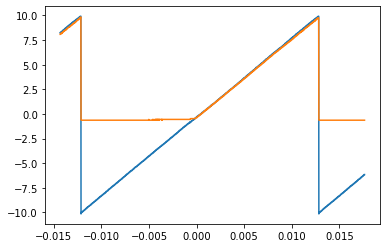

In [8]:
# attrs = {"Freq":40, "Res":10000,"diode":"1N4007","VPP":20,"onda":"rampa"}

# osci_autosave("diodo",attrs=attrs,plot_saved=True)

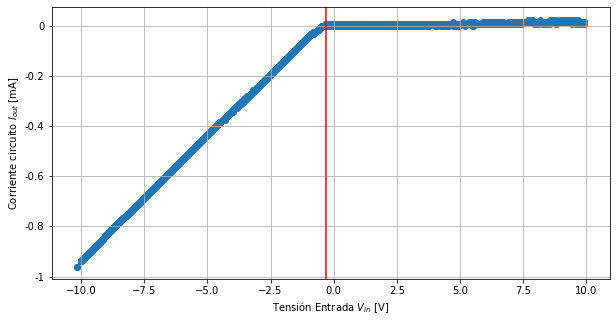

In [65]:
diode = pd.read_pickle("diodo")

Vin = diode['VCH1']
Vdiode = diode['VCH2']

Vr = Vin-Vdiode
I = Vr/10e3

plt.figure(figsize=(10,5))
plt.scatter(Vin, I)
plt.axvline(-.3,c='r')
plt.xlabel("Tensión Entrada $V_{in}$ [V]")
plt.ylabel("Corriente circuito $I_{out}$ [mA]")
plt.yticks([0,-.0002,-.0004,-.0006,-.0008,-.0010],["0","-0.2","-0.4","-0.6","-0.8","-1"])
# plt.xscale("log")
plt.grid()

# Zenner: V vs I

Medimos la caida de tensión en un diodo zenner en función de la tensión de entrada del circuito con una resistencia de 10kOhm

En el experimento, el canal 2 representa la caida de tensión sobre el zenner . 

Mientras que el canal 1 es la caida de tension sobre todo el circuito 
o sea, la corriente seria 

(Vf = Vr + zenner)Vr=Vf- vzenner= 

V_z = VCH2
VCH1 = V_f

V_Res = V_f - V_z = VCH1 - VCh2 

I = (V1 - V2)/R

que en este caso R = 10k 



# LED: V vs I

Igual que el diodo, resistencia de 10k 

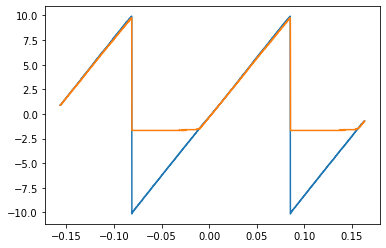

In [42]:
# attrs = {"Freq":6, "Res":10000,"diode":"led","VPP":20,"onda":"rampa"}

# osci_autosave("led",attrs=attrs,plot_saved=True)

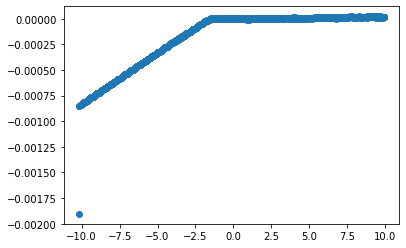

In [45]:
data2 = pd.read_pickle("led")
plt.scatter(data2["VCH1"],(data2["VCH1"]-data2['VCH2'])/10e3)

# Zenner: V vs I

Medimos la caida de tensión en un diodo zenner en función de la tensión de entrada del circuito con una resistencia de 10kOhm

En el experimento, el canal 2 representa la caida de tensión sobre el zenner . 

Mientras que el canal 1 es la caida de tension sobre todo el circuito 
o sea, la corriente seria 

(Vf = Vr + zenner)Vr=Vf- vzenner= 

V_z = VCH2
VCH1 = V_f

V_Res = V_f - V_z = VCH1 - VCh2 

I = (V1 - V2)/R

que en este caso R = 10k 



In [34]:
t, v1,v2 = get_osci()

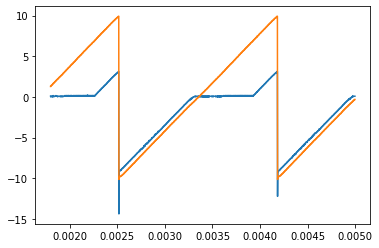

In [35]:
plt.plot(t,v1-v2)
plt.plot(t,v1)

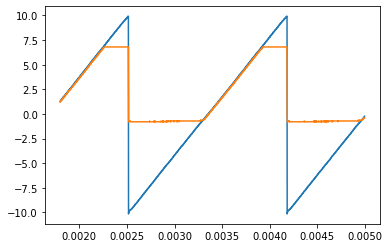

In [36]:
# attrs = {"Freq":600, "Res":10000,"diode":"1N4736A","VPP":20,"onda":"rampa"}

# osci_autosave("zenner",attrs=attrs,plot_saved=True)

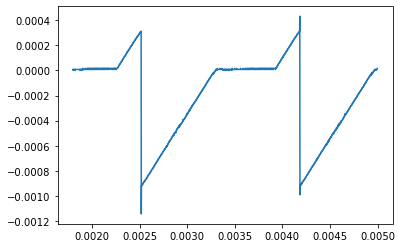

In [41]:
data2 = pd.read_pickle("zenner")
plt.plot(data2["time"],(data2["VCH1"]-data2['VCH2'])/10e3)

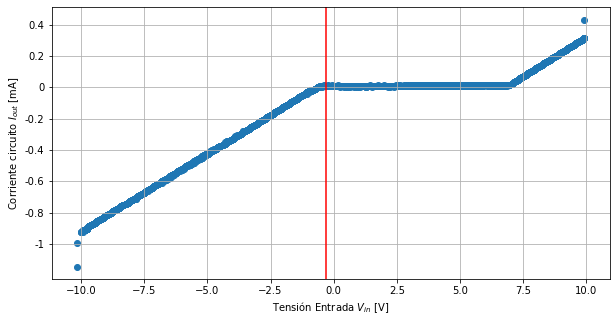

In [74]:
diode = pd.read_pickle("zenner")

Vin = diode['VCH1']
Vdiode = diode['VCH2']

Vr = Vin-Vdiode
I = Vr/10e3

plt.figure(figsize=(10,5))
plt.scatter(Vin, I)
plt.axvline(-.3,c='r')
plt.xlabel("Tensión Entrada $V_{in}$ [V]")
plt.ylabel("Corriente circuito $I_{out}$ [mA]")

plt.yticks([0.0004,0.0002,0,-.0002,-.0004,-.0006,-.0008,-.0010],["0.4","0.2","0","-0.2","-0.4","-0.6","-0.8","-1"])

plt.grid()

# Rectificador

Ahora hacemos un rectificador con un transformador desconocido, una resistencia de 10k y 4 diodos 1n4007

Usamos 4 frecuencias medio random , 100Hz, 250 Hz, 500Hz y 1kHz


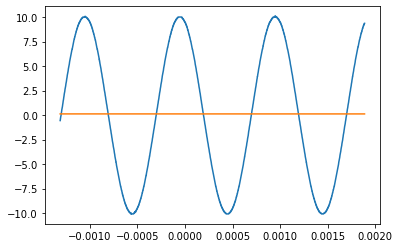

In [18]:
# attrs = {"Freq":1000, "Res":10000,"diode":"1N4736A","VPP":20,"onda":"rampa"}

# osci_autosave("rectificador/con_cap/1000",attrs=attrs,plot_saved=True)

In [19]:
pd.read_pickle('rectificador/con_cap/100')

,time,VCH1,VCH2
0,-0.007712,-9.92,0.110
1,-0.007704,-9.92,0.110
2,-0.007696,-9.92,0.110
3,-0.007688,-9.92,0.112
4,-0.007680,-9.84,0.112
...,...,...,...
1995,0.008248,7.20,0.112
1996,0.008256,7.12,0.108
1997,0.008264,7.12,0.110
1998,0.008272,7.12,0.112


In [ ]:
# el capa citor que usamos fue de 87uF

# ENclavador

87uF, 1n4007, 100Hz senoidal primero sin resistencia y despues con 

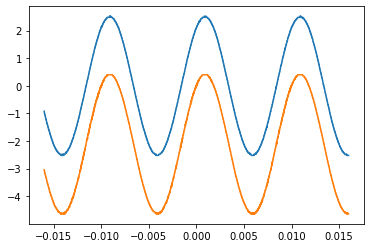

In [21]:
#Primera data sin resistencia
#CH2 -> output
#CH1 -> input 


# osci_autosave("enclavador1",attrs={},plot_saved=True)
#La primera data es con la polaridad "mal"


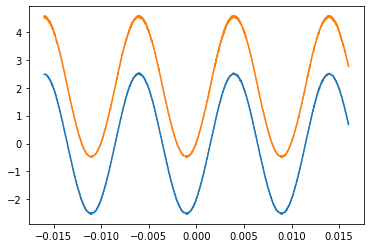

In [22]:
#Segunda data sin resistencia
#CH2 -> output
#CH1 -> input 


# osci_autosave("enclavador2",attrs={},plot_saved=True)
#La primera data es con la polaridad "bien"


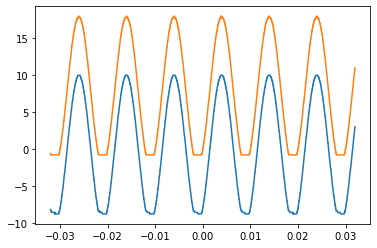

In [23]:
#tercera data con resistencia
#CH2 -> output
#CH1 -> input 

#usamos 20v

# osci_autosave("enclavador3",attrs={},plot_saved=True)
#La primera data es con la polaridad "bien"